In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.shape

(1093, 9)

In [4]:
df.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


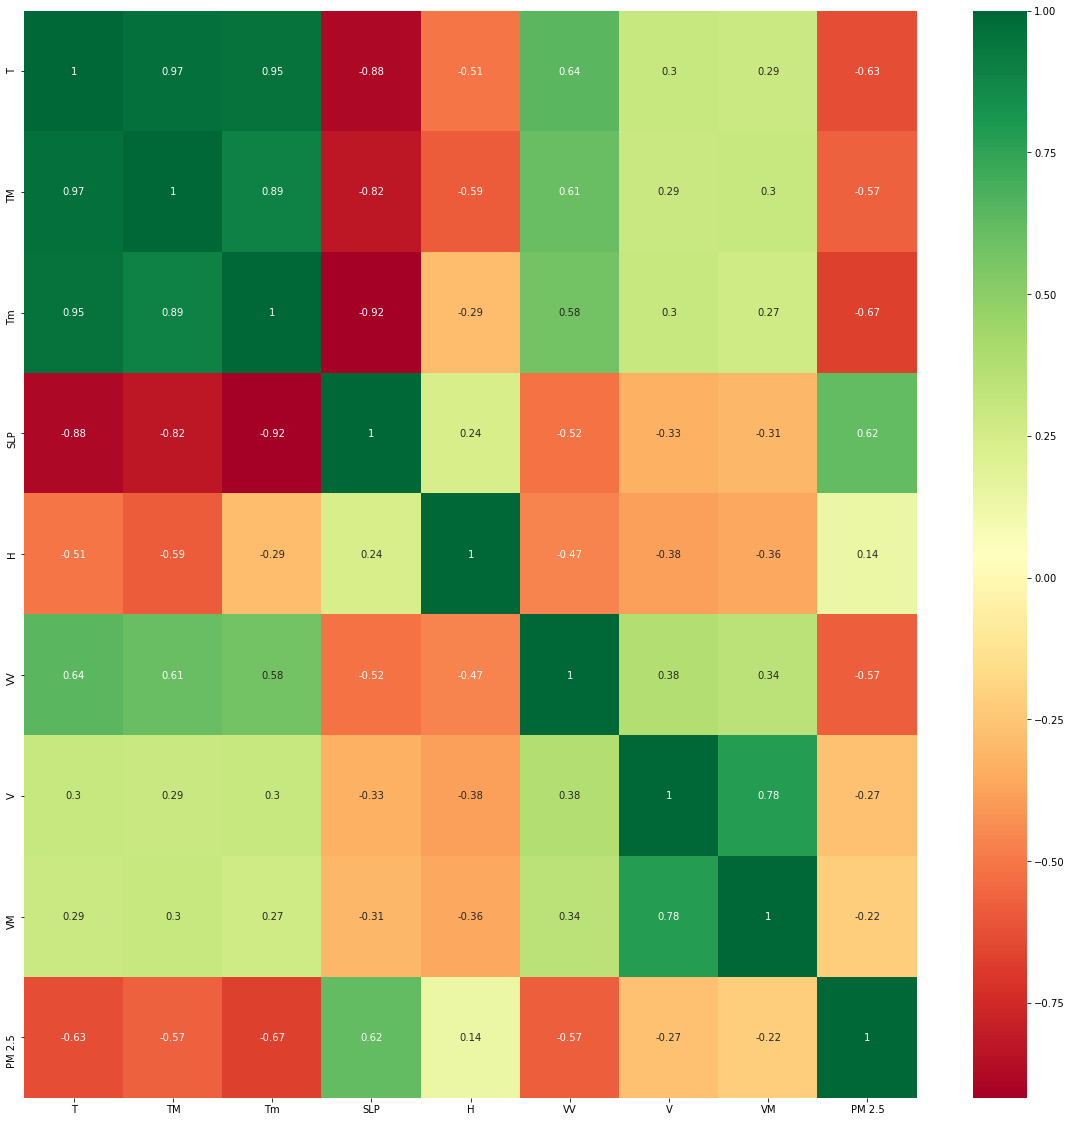

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

 ### K Nearest Neighbor Regression

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
regressor=KNeighborsRegressor(n_neighbors=1)   #we will find the k value using k=sqrt(n) ,Elbow method is used to find the value of k in k means algorithms
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [14]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [15]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5417545333477789


In [16]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [17]:
score.mean()

0.39387489016756577

# Model Evaluation

In [18]:
prediction=regressor.predict(X_test)

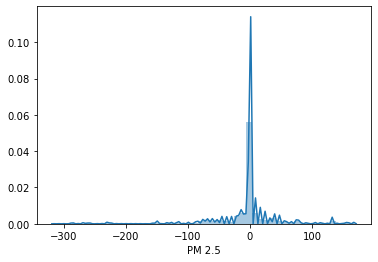

In [19]:
sns.distplot(y_test-prediction)

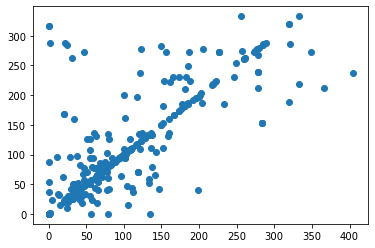

In [20]:
plt.scatter(y_test,prediction)

# Hyperparameter Tuning

In [21]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

In [22]:
score

array([-3682.54782197, -4377.54877522, -1772.1378131 , -5689.69442877,
       -2493.79590055, -3208.30927735, -4814.30205948, -1165.70810064,
       -5504.95875607, -2980.59491215])

In [26]:
accuracy_rate

[-3313.1422505508062,
 -2899.0314433509407,
 -3284.5243665217095,
 -3317.279988207386,
 -3335.442210407435,
 -3400.904747138454,
 -3469.9207164183877,
 -3417.0133615067652,
 -3416.7957560673376,
 -3454.1987626354485,
 -3458.561967648785,
 -3506.0418919791628,
 -3526.2341867771916,
 -3543.266012789109,
 -3543.9452857545575,
 -3536.191746081263,
 -3520.8407733401377,
 -3498.542714344937,
 -3503.7950317914933,
 -3495.9653877503465,
 -3497.998427901154,
 -3490.5630773743674,
 -3482.5177500963487,
 -3495.805531611562,
 -3509.4153978437207,
 -3488.5900860084703,
 -3500.045820751018,
 -3498.5524311206586,
 -3503.7679530398104,
 -3519.3080111715744,
 -3522.5488401980388,
 -3541.866642010783,
 -3547.557970469113,
 -3553.8470442853154,
 -3563.6683475537384,
 -3556.2286919807752,
 -3555.1569008322417,
 -3561.2943599939667,
 -3568.9597845299454]

Text(0, 0.5, 'Accuracy Rate')

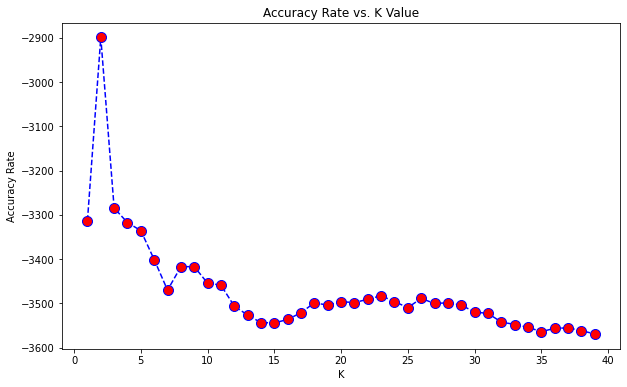

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [28]:
#fitting the model with K=3

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [32]:
predictions

array([ 66.45833333, 144.26527778, 321.05277778,  93.81944444,
        36.09722222, 138.47222222, 230.27777778, 160.45833333,
        60.08333333, 193.33333333,  80.30555556, 164.97222222,
        35.30555556,  68.91666667, 155.75      , 164.97222222,
       224.30555556, 186.04166667,  67.77777778, 132.67222222,
         9.125     ,  33.80555556,  41.45833333, 121.86111111,
       136.48611111,  86.93055556,  41.80555556, 155.38888889,
         9.125     ,  87.69444444,  81.45833333, 167.23611111,
        69.95833333,  50.51388889,  55.72222222,  86.04166667,
       264.79444444, 142.95833333,  86.23611111, 263.70833333,
        46.68055556,  40.55555556, 149.61111111, 114.54166667,
       233.11111111, 155.75      ,  75.66666667,  80.30555556,
       102.41666667,  84.13888889, 234.84444444,  75.41666667,
       265.47222222,  86.94444444,  34.33333333,  34.33333333,
       115.46944444, 163.65277778,  35.30555556,  35.        ,
        25.22222222, 114.47222222,  24.        , 265.47

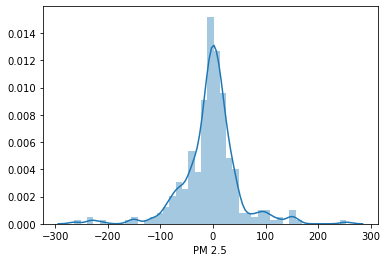

In [29]:
sns.distplot(y_test-predictions)

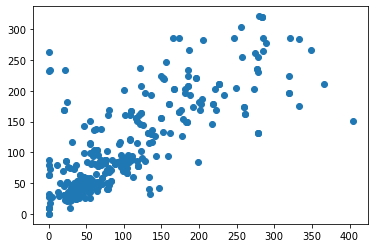

In [30]:
plt.scatter(y_test,predictions)

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 34.972675304878045
MSE: 2970.1032238207154
RMSE: 54.4986534129121


In [33]:
import pickle 

In [35]:
# open a file, where you ant to store the data
file = open('KNNRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(knn, file)